In [71]:
# cross validation을 통한 과적합 방지
import pandas as pd
from keras.models import Sequential, load_model
from keras.layers import Dense
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

# seed 값 생성
np.random.seed(56)
tf.random.set_seed(56)

# 데이터 로딩
df = pd.read_csv('../data files//sonar.csv',header=None)

In [62]:
# 전처리
dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

# 라벨링
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=56)
a = []

for i in range(20,100,5):
    model = Sequential()
    model.add(Dense(24,input_dim = 60, activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
    model.fit(X_train,Y_train,epochs=i,batch_size=5)
    a.append(model.evaluate(X_test,Y_test))

Epoch 1/20
29/29 [==============================] - 0s 962us/step - loss: 0.2512 - accuracy: 0.5586
Epoch 2/20
29/29 [==============================] - 0s 997us/step - loss: 0.2401 - accuracy: 0.5586
Epoch 3/20
29/29 [==============================] - 0s 1ms/step - loss: 0.2317 - accuracy: 0.5931
Epoch 4/20
29/29 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.5724
Epoch 5/20
29/29 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.7310
Epoch 6/20
29/29 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.7241
Epoch 7/20
29/29 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.7724
Epoch 8/20
29/29 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.7379
Epoch 9/20
29/29 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.7862
Epoch 10/20
29/29 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.7517
Epoch 11/20
29/

In [83]:
ep = 20
for i in range(len(a)):
    print("epoche : {}    mse : {:.4f}   accuracy : {:.4f}".format(ep,a[i][0],a[i][1]))
    ep += 5

epoche : 20    mse : 0.1695   accuracy : 0.7302
epoche : 25    mse : 0.1585   accuracy : 0.7619
epoche : 30    mse : 0.1462   accuracy : 0.8254
epoche : 35    mse : 0.1484   accuracy : 0.8095
epoche : 40    mse : 0.1509   accuracy : 0.8095
epoche : 45    mse : 0.1540   accuracy : 0.7937
epoche : 50    mse : 0.1580   accuracy : 0.7619
epoche : 55    mse : 0.1448   accuracy : 0.8413
epoche : 60    mse : 0.1663   accuracy : 0.7937
epoche : 65    mse : 0.1667   accuracy : 0.7937
epoche : 70    mse : 0.1836   accuracy : 0.7619
epoche : 75    mse : 0.1815   accuracy : 0.7619
epoche : 80    mse : 0.1785   accuracy : 0.7778
epoche : 85    mse : 0.1617   accuracy : 0.7937
epoche : 90    mse : 0.1449   accuracy : 0.8254
epoche : 95    mse : 0.1684   accuracy : 0.7937


In [85]:
ep_arr = [i for i in range(20,100,5)]
result = []
for i in range(len(a)):
    result.append(a[i][0])

print(ep_arr)
print(result)

[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
[0.16953697800636292, 0.15854482352733612, 0.14621026813983917, 0.14839236438274384, 0.1508742868900299, 0.15397332608699799, 0.15804053843021393, 0.1447850614786148, 0.16631636023521423, 0.16670171916484833, 0.18358491361141205, 0.18152041733264923, 0.1784982830286026, 0.16174203157424927, 0.1449434459209442, 0.16836893558502197]


<AxesSubplot:>

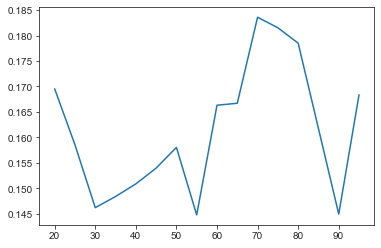

In [89]:
import seaborn as sns

sns.set_style('ticks')
sns.lineplot(x=ep_arr,y=result)

In [65]:
# k-fold
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=56)

# 학습실행
accuracy = []

for train, test in skf.split(X,Y):
    model = Sequential()
    model.add(Dense(24,input_dim = 60, activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
    model.fit(X[train],Y[train],epochs=60,batch_size=5)
    k_accuracy = "%.4f"%(model.evaluate(X[test],Y[test])[1])
    accuracy.append(k_accuracy)

Epoch 1/60
38/38 [==============================] - 0s 728us/step - loss: 0.2565 - accuracy: 0.4866
Epoch 2/60
38/38 [==============================] - 0s 755us/step - loss: 0.2398 - accuracy: 0.5348
Epoch 3/60
38/38 [==============================] - 0s 1ms/step - loss: 0.2317 - accuracy: 0.6364
Epoch 4/60
38/38 [==============================] - 0s 2ms/step - loss: 0.2193 - accuracy: 0.6684
Epoch 5/60
38/38 [==============================] - 0s 1ms/step - loss: 0.2085 - accuracy: 0.7273
Epoch 6/60
38/38 [==============================] - 0s 997us/step - loss: 0.1962 - accuracy: 0.7273
Epoch 7/60
38/38 [==============================] - 0s 916us/step - loss: 0.1872 - accuracy: 0.7433
Epoch 8/60
38/38 [==============================] - 0s 1ms/step - loss: 0.1839 - accuracy: 0.7594
Epoch 9/60
38/38 [==============================] - 0s 1ms/step - loss: 0.1709 - accuracy: 0.7754
Epoch 10/60
38/38 [==============================] - 0s 1ms/step - loss: 0.1641 - accuracy: 0.7968
Epoch 11/60

In [66]:
print('k-fold accuracy',accuracy )

k-fold accuracy ['0.8095', '0.7143', '0.8095', '0.9048', '0.9048', '0.7143', '0.7619', '0.9524', '0.8000', '0.8500']


In [68]:
model.save('my_model.h5')

In [69]:
del model

In [72]:
model = load_model('my_model.h5')

In [73]:
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9048


[0.07113467156887054, 0.9047619104385376]